### Упражнение 1

На одном графике изобразите время затраченное на вычисление с использованием массивов numpy и стандартных списков в питоне.  
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте. 
* Используйте функцию `z = 2*x**2 + 4*y`
* Перемножение матриц размера n на n

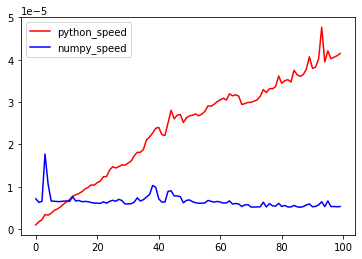

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt # основной модуль
%matplotlib inline

from IPython import display





def python(size_of_vec):
    start = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [2 * X[i]** 2 + 4 * Y[i] for i in range(len(X))]
    return time.time() - start

def numpy(size_of_vec):
    start = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = 2 * X ** 2 + 4 * Y
    return time.time() - start


size_of_vec = np.arange(80)

count = 100

python_result =[ ]
numpy_result =[ ]


for i in np.arange(count):
    python_speed = []
    numpy_speed = []
    for j in size_of_vec:
        python_speed.append(python(i))
        numpy_speed.append(numpy(i))
    python_result.append(sum(python_speed) / len(python_speed)) 
    numpy_result.append(sum(numpy_speed) / len(numpy_speed)) 

plt.plot(python_result , color = 'r' , label = 'python_speed')
plt.plot(numpy_result , color = 'b' , label = 'numpy_speed' )
plt.legend()
plt.show()


In [1]:
import numpy as np

### Упражнение 2
* Создайте массив чисел от 2 до 75. Выведите только нечётные. 
* Присвойте нечётным числам этого массива значение -1.



In [6]:
array = np.arange(2, 75)
print(array[ array % 2 == 1])
array[ array % 2 == 1] = - 1
print(array)

[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73]
[ 2 -1  4 -1  6 -1  8 -1 10 -1 12 -1 14 -1 16 -1 18 -1 20 -1 22 -1 24 -1
 26 -1 28 -1 30 -1 32 -1 34 -1 36 -1 38 -1 40 -1 42 -1 44 -1 46 -1 48 -1
 50 -1 52 -1 54 -1 56 -1 58 -1 60 -1 62 -1 64 -1 66 -1 68 -1 70 -1 72 -1
 74]


### Упражнение 3

* Найдите в документации функцию, которая удаляет из одного массива элементы, которые есть в другом. 
* Приведите примеры использования.

Можно воспользоваться
setdiff1d(x, y)

Например мы собрали данные в массив и знаем, что среди них могут быть значения, которые явно(по каким либо причинам) могут создавать шум, и мы, фильтруем их с помощью массива.

### Упражнение 4

* Создайте случайную квадратную матрицу случайного размера от 10 до 100. 
* Найдите максимум и сумму элементов.
* Поделите каждый элемент матрицы на максимум.
* Отнимите от каждой строки матрицы среднее по строке.
* Замените максимальное значение на -1.

In [81]:
# number = np.random.randint(10,100)
matrix = np.random.rand(3, 3)
print(matrix, '\n')
print(matrix.max() , ' - максимум\n')
print(matrix.sum() , ' - сумма элементов\n' )
# print(matrix)
matrix =  matrix / matrix.max()
print(matrix, '- поделил элементы матрицы на максимальный элемент\n')


print(matrix.mean(axis = 1) , ' - среднее по строке \n')

matrix =  matrix - matrix.mean(axis=1, keepdims=True)
print(matrix, 'Отнял от каждой строки матрицы среднее по строке. \n')

max_valus_index =  np.unravel_index(matrix.argmax(), matrix.shape) 
matrix[max_valus_index] = -1
print(matrix, '- заменил максимальное значение на -1')




[[0.41696817 0.25424038 0.19718119]
 [0.16565197 0.47247231 0.62395932]
 [0.96603663 0.10294848 0.10604892]] 

0.9660366250021767  - максимум

3.3055073810446416  - сумма элементов

[[0.4316277  0.26317883 0.20411358]
 [0.17147587 0.48908322 0.64589614]
 [1.         0.10656789 0.10977733]] - поделил элементы матрицы на максимальный элемент

[0.29964004 0.43548508 0.40544841]  - среднее по строке 

[[ 0.13198767 -0.03646121 -0.09552646]
 [-0.26400921  0.05359815  0.21041106]
 [ 0.59455159 -0.29888052 -0.29567108]] Отнял от каждой строки матрицы среднее по строке. 

[[ 0.13198767 -0.03646121 -0.09552646]
 [-0.26400921  0.05359815  0.21041106]
 [-1.         -0.29888052 -0.29567108]] - заменил максимальное значение на -1


### Упражнение 5
* Напишите функцию, которая берет многомерный вещественный массив с пропущенными значениями (np.nan) и возвращает его копию с заполненными пропусками (заменять средним значением всех элементов массива). Если в массиве одни пропущенные значения, заполните их нулями.

In [117]:
import warnings
matrix = [ [1 , 2 ] , 
           [ np.nan , 4]  
         ]

matrix_nan = [ [np.nan , np.nan ] , 
           [ np.nan , np.nan]  
         ]

print(matrix)

def transform_array(array):
    
    with warnings.catch_warnings():
      
        warnings.filterwarnings('error')
        try:
            col_mean = np.nanmean(array)
            array = np.nan_to_num(array, nan=col_mean)
        except RuntimeWarning:
            array = np.nan_to_num(array, nan=0.0) 
    
    return array

print(transform_array(matrix))
print(transform_array(matrix_nan))


[[1, 2], [nan, 4]]
[[1.         2.        ]
 [2.33333333 4.        ]]
[[0. 0.]
 [0. 0.]]


### Упражнение 6
* Напишите функцию которая нормализирует заданный numpy-массив, так чтобы его значения лежали в интервале $[0, 1]$.

In [122]:
matrix = [ [1 , 2 ] , 
           [ 3 , 4]  
         ]


def normalize(array):
    norm = np.linalg.norm(array)
    return  array/norm
    
matrix = normalize(matrix)
matrix


array([[0.18257419, 0.36514837],
       [0.54772256, 0.73029674]])

### Упражнение 7
* Запишите numpy-array в файл.
* Считайте numpy-array из файла.

In [138]:
matrix = [ [1 , 2 ] , 
           [ 3 , 4]  
         ]


np.savetxt('/Users/max/Downloads/test.txt', matrix, delimiter=',')
matrix =  np.loadtxt('/Users/max/Downloads/test.txt',delimiter=',')
matrix

array([[1., 2.],
       [3., 4.]])

### Упражнение 8
* Создайте случайный массив
* Найдите в массиве элемент ближайший к данному

In [149]:
number = 5

array = np.random.randint(0, 1000, 5)

print(array)

array[np.abs(array-number).argmin()]

[699 370 794 410 556]


370

### Упражнение 9

* Напишите функцию, которая возвращает  $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри

In [180]:
def func ( bound_values, inside_values , n , m ):
    
    matrix = np.full((n, m), inside_values)
    
#     matrix[0][0] =  bound_values
#     matrix[n-1][m-1] =  bound_values
    
    matrix[0] = bound_values
    matrix[n-1] = bound_values
    matrix[:,0:1] = bound_values
    matrix[:,m-1:m] = bound_values
    
    return matrix

a = func(1, 2, 5, 8 )

a

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 2, 2, 2, 2, 2, 2, 1],
       [1, 2, 2, 2, 2, 2, 2, 1],
       [1, 2, 2, 2, 2, 2, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

### Упражнение 10
* Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания. 

In [196]:
matrix = [ [1 , 2 , 3 ,6] , 
           [ 3 , 4 , 2, 7],
           [ 6 , 1 , 3, 14],
           [ 3 , 4 , 2, 8]
         ]
matrix = np.array(matrix)



def sort_matrix(matrix, n_columns):
    return matrix[np.argsort(matrix[:,n_columns-1])][::-1]


matrix = sort_matrix(matrix, 4)

matrix
    

array([[ 6,  1,  3, 14],
       [ 3,  4,  2,  8],
       [ 3,  4,  2,  7],
       [ 1,  2,  3,  6]])

### Упражнение 11

* Напишите функцию, которая создает двоичную матрицу шахматной доски с заданным shape

Пример 4x4:
```python
[[0, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0]]
```

### Упражнение 12
* Напишите игру [life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), используя массивы numpy.
* Визуализируйте интерактивно ее результаты.

